In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
#load dataset
data=pd.read_csv('image_path.csv')
data.head()

,Fractured,Non-Fractured
0,bones_image/Combined Dataset\Fractured\Fractur...,bones_image/Combined Dataset\Non-Fractured\Non...
1,bones_image/Combined Dataset\Fractured\Fractur...,bones_image/Combined Dataset\Non-Fractured\Non...
2,bones_image/Combined Dataset\Fractured\Fractur...,bones_image/Combined Dataset\Non-Fractured\Non...
3,bones_image/Combined Dataset\Fractured\Fractur...,bones_image/Combined Dataset\Non-Fractured\Non...
4,bones_image/Combined Dataset\Fractured\Fractur...,bones_image/Combined Dataset\Non-Fractured\Non...


In [3]:
data['Fractured']

0       bones_image/Combined Dataset\Fractured\Fractur...
1       bones_image/Combined Dataset\Fractured\Fractur...
2       bones_image/Combined Dataset\Fractured\Fractur...
3       bones_image/Combined Dataset\Fractured\Fractur...
4       bones_image/Combined Dataset\Fractured\Fractur...
                              ...                        
4935    bones_image/Combined Dataset\Fractured\Fractur...
4936    bones_image/Combined Dataset\Fractured\Fractur...
4937    bones_image/Combined Dataset\Fractured\Fractur...
4938    bones_image/Combined Dataset\Fractured\Fractur...
4939    bones_image/Combined Dataset\Fractured\Fractur...
Name: Fractured, Length: 4940, dtype: object

In [7]:
#Def image processing

def image_processing(img_path):
    img=cv2.imread(img_path)
    plt.imshow(img)
    
    #convert to rgb
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    #resize to 100*100
    img_resize=cv2.resize(img_rgb, (100,100))
    plt.imshow(img_resize)
    #convert to numpy array
    img_arr=np.array(img_resize).flatten()
    #convert to dataframe
    img_df=pd.DataFrame(img_arr).T
    return img_df
   


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


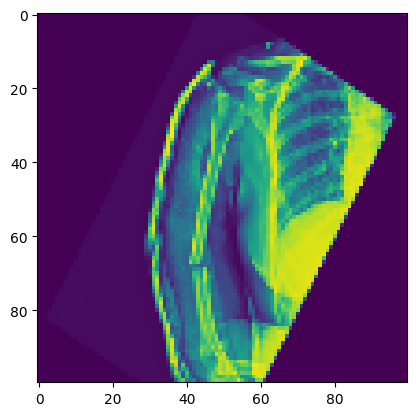

In [8]:
image_processing(data['Fractured'][0])

In [9]:
final_df=pd.DataFrame()

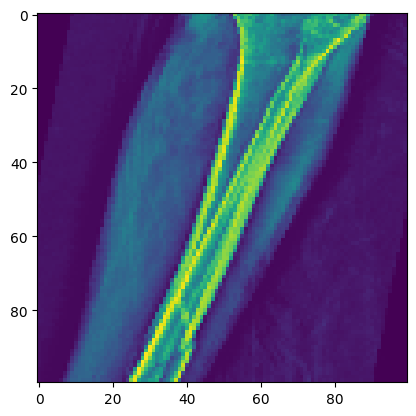

In [10]:
for img in data['Fractured']:
    df_x=image_processing(img)
    final_df=pd.concat([final_df,df_x])
final_df['label']='Fractured'
            

In [11]:
final_dfx=pd.DataFrame()

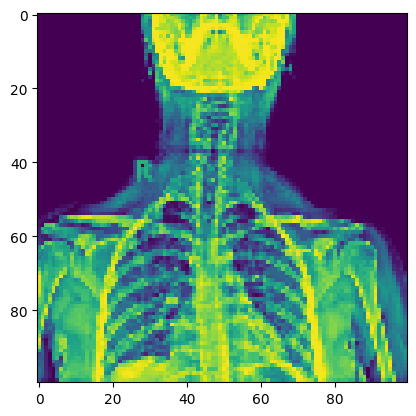

In [12]:
for img in data['Non-Fractured']:
    df_x=image_processing(img)
    final_dfx=pd.concat([final_dfx,df_x])
final_dfx['label']='Non-Fractured'

In [13]:
final_df.index=range(len(final_df))


In [14]:
final_dfx.index=range(len(final_dfx))

In [15]:
# final_df.to_csv('bone_fractured_unlabelled.csv',index='False')

In [16]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
2,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
3,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
4,0,0,0,0,0,0,7,9,16,23,...,0,0,0,0,0,0,0,0,0,Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
4936,44,48,49,47,44,53,48,46,48,48,...,11,11,11,11,11,11,11,11,11,Fractured
4937,44,48,49,47,44,53,48,46,48,48,...,11,11,11,11,11,11,11,11,11,Fractured
4938,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,Fractured


In [17]:
final_dfx

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,21,21,21,21,21,21,21,21,20,19,...,21,21,21,21,21,21,21,21,21,Non-Fractured
1,21,21,21,21,21,21,21,21,21,19,...,21,21,21,21,21,21,21,21,21,Non-Fractured
2,0,0,0,0,0,0,0,0,0,0,...,21,20,20,20,20,20,20,21,0,Non-Fractured
3,14,14,14,14,14,14,14,14,14,14,...,176,179,179,174,163,164,145,106,38,Non-Fractured
4,185,181,179,174,162,167,168,169,171,170,...,234,224,169,113,15,0,0,20,34,Non-Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,6,6,6,6,6,6,6,6,6,6,...,18,18,18,18,18,18,18,18,18,Non-Fractured
4936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
4938,16,16,16,16,16,16,28,103,116,119,...,36,25,16,16,16,16,16,16,16,Non-Fractured


In [18]:
final_df.shape

(4940, 10001)

In [19]:
final_dfx.shape

(4940, 10001)

In [20]:
# concating final_df and final_dfx
final_images_df=pd.concat([final_df,final_dfx])

In [22]:
final_images_df.to_csv('final_images_df.csv', index=False)


In [26]:
data1=pd.read_csv('final_images_df.csv')

In [27]:
data1

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fractured
2,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
3,25,26,23,21,21,21,21,21,21,21,...,32,33,31,32,31,34,33,35,33,Fractured
4,0,0,0,0,0,0,7,9,16,23,...,0,0,0,0,0,0,0,0,0,Fractured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,6,6,6,6,6,6,6,6,6,6,...,18,18,18,18,18,18,18,18,18,Non-Fractured
9876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
9877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Non-Fractured
9878,16,16,16,16,16,16,28,103,116,119,...,36,25,16,16,16,16,16,16,16,Non-Fractured
